# Telecom: predicting customer churn

The operator of communication "Niedinogorazryva.com" wants to learn how to predict the churn of customers. If it turns out that the user is planning to leave, he will be offered promo codes and special conditions. The operator's team collected personal data about some customers, information about their tariffs and contracts.

With the help of these data, it is necessary to build a model that will qualitatively predict the churn of customers.

## Work plan

### Downloading and researching data
- #### Import libraries
- #### Loading of available data
- #### Description of uploaded data
- #### Complex data analysis and processing (anomaly search, duplicate processing, categorical feature processing, data reduction to the desired format, etc.)
- #### Combining data

### Preparing data for training
- #### Determining the target attribute
- #### Combining data into a single dataframe
- #### Preparing features for model training (remove obviously unnecessary features, create a new feature based on existing features, scale features)
- #### Divide the dataframe into training and test samples
- #### Assess the presence of class imbalance and, if necessary, eliminate it

### Model Training
- #### Select several types of models (random forest, gradient boosting, etc.)
- #### On the training sample, train the model using the GridSearchCV method, select optimal hyperparameters and evaluate the quality of models using the ROC-AUC metric
- #### Plot ROC-AUC curves
- #### Based on the metrics obtained, we can conclude about the effectiveness of the trained models and choose the optimal one for further testing

### Testing the model
- #### To conduct a test on the selected optimal model, the resulting AUC-ROC metric should be at least 0.87
- #### Make a conclusion about the effectiveness of the resulting model

### Results
- #### To summarize and present the results obtained
- #### To make a general conclusion about the effectiveness of the results obtained

## Downloading and data exploration

The data consists of files received from different sources:

- `contract.csv` — information about the contract;
- `personal.csv` — client's personal data;
- `internet.csv` — information about internet services;
- `phone.csv` — information about telephony services.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [9]:
df_contract = pd.read_csv('datasets/contract_f.csv').drop(columns='Unnamed: 0')
df_personal = pd.read_csv('datasets/personal_f.csv').drop(columns='Unnamed: 0')
df_internet = pd.read_csv('datasets/internet_f.csv').drop(columns='Unnamed: 0')
df_phone = pd.read_csv('datasets/phone_f.csv').drop(columns='Unnamed: 0')

In [10]:
def main_info(df):
    display(df.head())
    display(df.describe())
    display(df.info())
    print('Number of duplicates:', df.duplicated().sum())

In [11]:
main_info(df_contract)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

Number of duplicates: 0


In [12]:
main_info(df_personal)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

Number of duplicates: 0


In [13]:
main_info(df_internet)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

Number of duplicates: 0


In [14]:
main_info(df_phone)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

Number of duplicates: 0


### Conclusion
- Data uploaded
- The data consists of 4 datasets, in total, in which there are data of 7043 people
- No obvious duplicates have been identified separately in each dataset
- In two of the four datasets, the number of rows is less than 7043, which tells us that when combining data, there will be missing values that need to be processed.

## Complex data analysis, processing and aggregation

### df_contract

In [15]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [16]:
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


- 1) Based on the EndDate attribute, we will highlight the target
- 2) Based on the BeginDate and EndDate attributes, we can calculate a new attribute - the number of days the client has been with us (taking into account that the date of unloading the dataset is 2020-02-01)
- 3) Check the data for anomalies and bring all the signs to required formats

#### Selection of the target

In [17]:
df_contract['Churn'] = 1

In [18]:
df_contract['Churn'].where(df_contract['EndDate']!='No',0, inplace=True)

In [19]:
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,1


- 0 - client stayed
- 1 - client left

#### Creation of a new feature

In [20]:
df_contract['EndDate'].where(df_contract['EndDate']!='No','2020-02-01', inplace=True)

In [21]:
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'])
df_contract['EndDate'] = pd.to_datetime(df_contract['EndDate'])

In [22]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
 8   Churn             7043 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 495.3+ KB


In [23]:
df_contract['Days'] = df_contract['EndDate'] - df_contract['BeginDate']

In [24]:
df_contract['Days'] = df_contract['Days'].dt.days.astype('int64')

In [25]:
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Days
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.5,0,1036
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,61
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,61


#### Anomaly Search

In [26]:
df_contract[df_contract['TotalCharges']==' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Days
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,,0,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,,0,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,,0,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,,0,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,,0,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,,0,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,,0,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,,0,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,,0,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,,0,0


In this case, equate the `Total Charges` column to `MonthlyCharges`

In [27]:
df_contract['TotalCharges'].where(df_contract['TotalCharges']!=' ',df_contract['MonthlyCharges'], inplace=True)

In [28]:
df_contract['TotalCharges'] = df_contract['TotalCharges'].astype('float64')

In [29]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Churn             7043 non-null   int64         
 9   Days              7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 550.4+ KB


In [30]:
df_contract.describe()

,MonthlyCharges,TotalCharges,Churn,Days
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,2279.798992,0.265370,985.996166
std,30.090047,2266.730170,0.441561,747.587844
min,18.250000,18.800000,0.000000,0.000000
25%,35.500000,398.550000,0.000000,273.000000
50%,70.350000,1394.550000,0.000000,883.000000
75%,89.850000,3786.600000,1.000000,1676.000000
max,118.750000,8684.800000,1.000000,2191.000000


<AxesSubplot:>

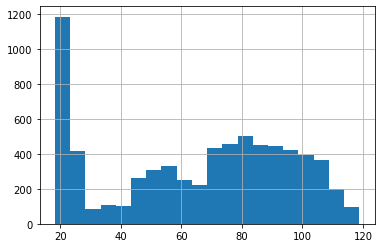

In [31]:
df_contract['MonthlyCharges'].hist(bins=20)

<AxesSubplot:>

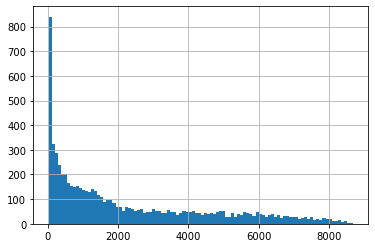

In [32]:
df_contract['TotalCharges'].hist(bins=100)

Let's see how the monthly payments are distributed by customer groups — the remaining and the departed

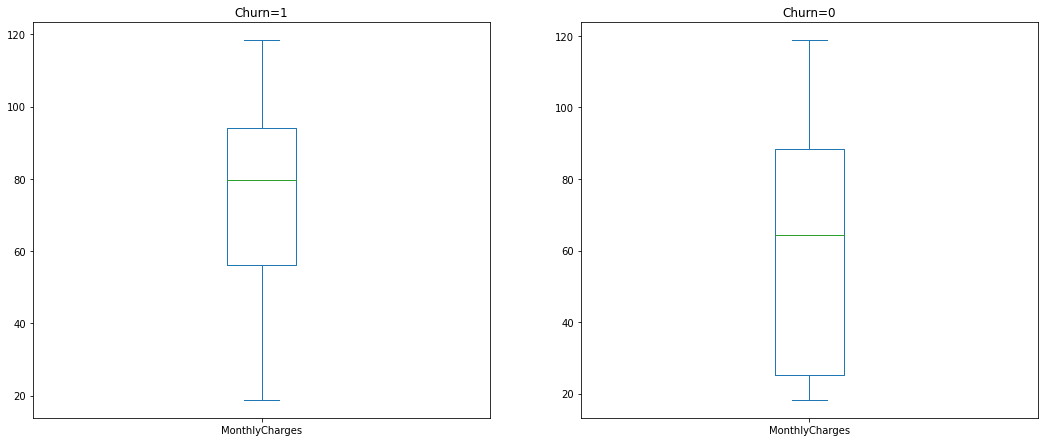

In [33]:
fig = plt.figure()

ax_1 = fig.add_subplot(2, 2, 1)
df_contract[df_contract['Churn']==1]['MonthlyCharges'].plot(kind='box', figsize=(18,16))
ax_2 = fig.add_subplot(2, 2, 2)
df_contract[df_contract['Churn']==0]['MonthlyCharges'].plot(kind='box', figsize=(18,16))

ax_1.set(title = 'Churn=1')
ax_2.set(title = 'Churn=0')

plt.show()

As can be seen from the graphs, the exiting customers paid more monthly than the remaining ones (seen by the median value and the location of quartiles)

Perhaps this was one of the reasons for the client's departure.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

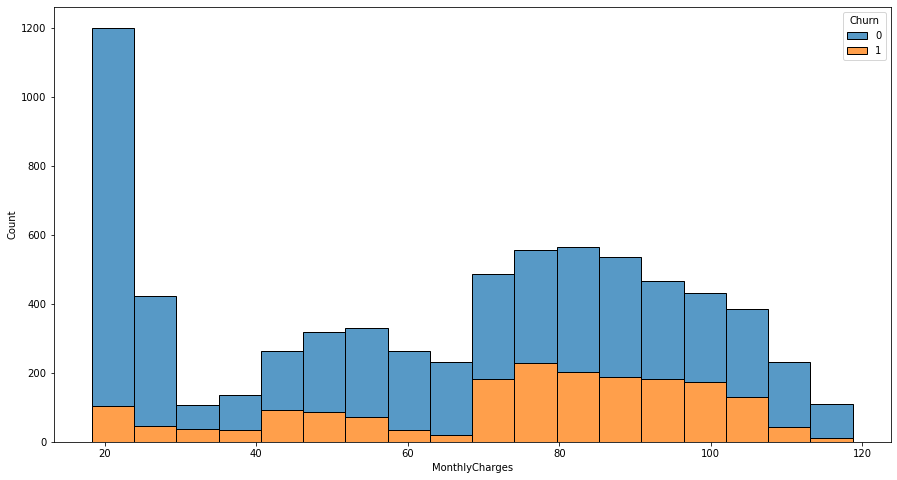

In [40]:
plt.figure(figsize=(15,8))
sns.histplot(data = df_contract, x = 'MonthlyCharges', hue = 'Churn', multiple = 'stack')

### df_personal

In [41]:
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [42]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


No anomalies were detected

### df_internet

In [43]:
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [44]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


No anomalies were detected

### df_phone

In [45]:
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [46]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


No anomalies were detected

### Merging data

In [49]:
df_main = df_contract.merge(df_personal, on='customerID', how='left').merge(df_internet, on='customerID', how='left').merge(df_phone, on='customerID', how='left')

In [50]:
df_main.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Days,...,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,31,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,0,1036,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,61,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,61,...,No,No,Fiber optic,No,No,No,No,No,No,No


In the combined dataset, we have missing values, we will allocate these missing values into individual categories when translating categorical features into quantitative ones.

In [51]:
not_for_coding = ['customerID','BeginDate','EndDate','MonthlyCharges','TotalCharges','Churn','Days']
for_coding = []
for i in df_main.columns:
    if i not in not_for_coding:
        for_coding.append(i)

In [52]:
df_coding = df_main[for_coding]

In [53]:
df_coding.fillna('No', inplace=True)

In [54]:
data_ohe = pd.get_dummies(df_coding, drop_first=True)

All categorical features are encoded by the OHE method

In [55]:
data_ohe.head()

,SeniorCitizen,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes
0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [56]:
df_main.drop(columns=for_coding, inplace=True)

In [57]:
df_main = pd.merge(df_main, data_ohe, left_index=True, right_index=True)

In [58]:
df_main.drop(columns=['customerID','BeginDate','EndDate'], inplace=True)

Removed obviously unnecessary features that will interfere with the training of the model

In [59]:
df_main.columns

Index(['MonthlyCharges', 'TotalCharges', 'Churn', 'Days', 'SeniorCitizen',
       'Type_One year', 'Type_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'MultipleLines_Yes'],
      dtype='object')

In [60]:
df_plot = df_main[['MonthlyCharges','TotalCharges','Days']]

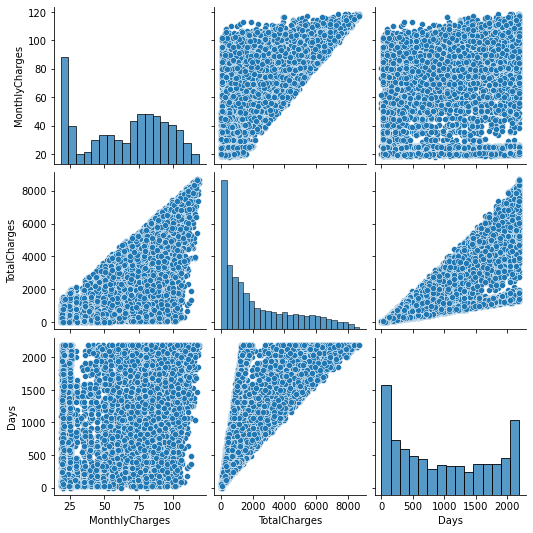

In [61]:
sns.pairplot(df_plot)

In [62]:
df_plot.corr()

,MonthlyCharges,TotalCharges,Days
MonthlyCharges,1.000000,0.651182,0.247754
TotalCharges,0.651182,1.000000,0.826095
Days,0.247754,0.826095,1.000000


As can be seen from the graphs and from the values of the Pearson correlation coefficients, the signs of Days and Total Charges have a fairly significant relationship between each other.

## Training and testing

### Features preparation

First, let's check if there is an imbalance of classes in our sample

In [63]:
df_main['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

<AxesSubplot:>

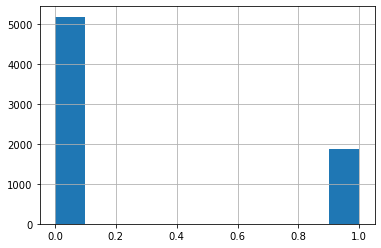

In [64]:
df_main['Churn'].hist()

As we can see, the class imbalance is significantly large, which should be taken into account when training the model

In [65]:
target = df_main['Churn']
features = df_main.drop('Churn', axis=1)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=290822, stratify=target)

Now let's scale the numerical features

In [66]:
numeric = ['MonthlyCharges','TotalCharges', 'Days']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

### LogisticRegression

In [67]:
random_state = 290822

In [68]:
model = LogisticRegression(random_state=random_state, solver='liblinear')
model.fit(features_train, target_train)

scores = cross_val_score(model, features_train, target_train, cv=5, scoring='roc_auc')
print("Linear regression: mean_cross_val_score: {:.3f}".format(scores.mean()))

Linear regression: mean_cross_val_score: 0.847


### RandomForestClassifier

In [69]:
%%time

params = {
    'max_depth': range(5, 15, 1),
    'min_samples_leaf':range(1,4,1),
    'n_estimators':range(100,400,50)
}
model = RandomForestClassifier(random_state=random_state)

rf = RandomizedSearchCV(
        model,
        params,
        scoring='roc_auc',
        cv=5,
        n_jobs=-1, n_iter=50)

rf.fit(features_train, target_train)

Wall time: 3min 6s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=290822),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': range(5, 15),
                                        'min_samples_leaf': range(1, 4),
                                        'n_estimators': range(100, 400, 50)},
                   scoring='roc_auc')

In [70]:
rf.best_params_

{'n_estimators': 200, 'min_samples_leaf': 1, 'max_depth': 9}

In [71]:
model = RandomForestClassifier(random_state=random_state, n_estimators=rf.best_params_['n_estimators'], 
                               min_samples_leaf=rf.best_params_['min_samples_leaf'], max_depth=rf.best_params_['max_depth'])

model.fit(features_train, target_train)
print("Random_forest regression: mean_cross_val_score: {:.3f}".format(rf.best_score_))

Random_forest regression: mean_cross_val_score: 0.862


### CatBoostClassifier

In [72]:
%%time

params = {
    'iterations':range(100,1000,100),
    'depth': range(1, 15, 2) 
}
model = CatBoostClassifier(random_state=random_state, verbose=False, loss_function="Logloss")

cb = RandomizedSearchCV(
        model,
        params,
        scoring='roc_auc',
        cv=5,
        n_jobs=-1,        
        n_iter=20)

cb.fit(features_train, target_train)

Wall time: 15min 53s


RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001DD492E58E0>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'depth': range(1, 15, 2),
                                        'iterations': range(100, 1000, 100)},
                   scoring='roc_auc')

In [73]:
cb.best_params_

{'iterations': 800, 'depth': 5}

In [74]:
model = CatBoostClassifier(random_state=random_state, verbose=False, iterations=cb.best_params_['iterations'],
                           depth=cb.best_params_['depth'])

model.fit(features_train, target_train)
print("CatBoost: mean_cross_val_score: {:.3f}".format(cb.best_score_))

CatBoost: mean_cross_val_score: 0.899


### Intermediate evaluation of models

ROC-AUC values on training samples:
- Linear_regression = 0.847
- Random_forest = 0.862
- CatBoost = 0.898

Based on the AUC-ROC values, the Cat Boost model with the following selected hyperparameters showed itself in the best way during cross-validation:

- iterations = 800
- depth = 7

We will use this model on a test sample.

### Testing the model

In [75]:
probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_test,probabilities_one_valid)
print('AUC-ROC value on test data: {:.3f}'.format(auc_roc))

AUC-ROC value on test data: 0.902


In [76]:
rndm_probabilities = probabilities_one_valid*0+1

In [77]:
auc_roc = roc_auc_score(target_test,rndm_probabilities)
print('AUC-ROC value on a constant model: {:.3f}'.format(auc_roc))

AUC-ROC value on a constant model: 0.500


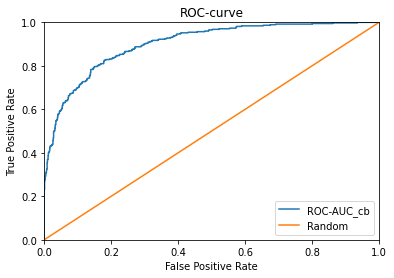

In [78]:
fpr_cb, tpr_cb, thresholds_cb = roc_curve(target_test, probabilities_one_valid)
fpr_rndm, tpr_rndm, thresholds_rndm = roc_curve(target_test, rndm_probabilities)

plt.figure()
plt.plot(fpr_cb, tpr_cb, label='ROC-AUC_cb')
plt.plot(fpr_rndm, tpr_rndm, label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.legend()
plt.show() 

In [79]:
df_importance = pd.DataFrame({'features': model.feature_names_, 'score': model.get_feature_importance()})
df_importance = df_importance.sort_values(by="score", ascending = False)

<AxesSubplot:xlabel='score', ylabel='features'>

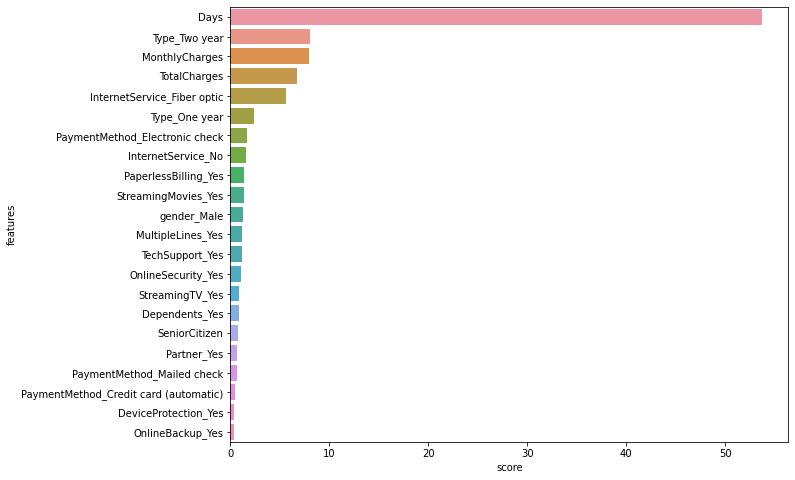

In [80]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(ax=ax, x=df_importance["score"], y=df_importance["features"])

As can be seen from the constructed graph of the importance of features, the most influential features are:

- Days
- Monthly Charges
- Total Charges

We can additionally analyze the data and exclude features from the sample that do not significantly affect the result of the model.

We can take 10-15 first features and try to train the model again, compare the quality

### General Conclusion

A comprehensive analysis and processing of the data was carried out:
- the data was checked for duplicates
- after merging, the missing values were allocated to a separate category
- all categorical features have been translated into quantitative ones
- superfluous features have been removed
- scaling of numerical features is carried out

3 models were tested on the data obtained:
- all calculations of the model were carried out taking into account cross-validation, the best parameters were obtained
- the adequacy of the models was tested on the values of the constant model
- based on the obtained AUC-ROC values, a model was selected on the training sample, on the basis of which testing was carried out and the AUC-ROC value > 0.87 was obtained
- the model on which the best result turned out to be the CatBoost model, with the value AUC-ROC = 0.901 and the selected hyperparameters iterations = 800, depth = 7
- The features that have the greatest impact on the learning outcome of the model were also identified

## Report

### Compliance with the previously drawn up plan and difficulties encountered in the implementation of the project

- All the points indicated in the previously drawn up plan are available in full in the work done, with the exception of one factor:

  - Initially, I planned to use the GridSearchCV method to select hyperparameters, but when executing the project, I came across the fact that the selection of hyperparameters using GridSearchCV took a very long time, this problem was solved by the RandomizedSearchCV method, which allows you to limit the number of required operations, thereby reducing data processing time
  
  
- Also, in the course of the project, such items were added as:

- Calculation of a new feature from two original ones;
  
  - Initially, I planned to train two models (randomForest, CatBoost), but in the process I also decided to check what results the Linear Regression model would show;
  
  - Also, based on the results of testing the selected model, it was decided to add an item with the calculation and visualization of parameters that have the greatest impact on the result of the model
  
  
- As for the difficulties I have encountered, I would only attribute a long time to the selection of parameters using GridSearchCV (I wrote about this earlier)

### Downloading and researching data
- Import of libraries - all necessary libraries were imported in a separate cell
- Loading of available data - 4 different datasets were loaded
- Description of uploaded data - primary data exploration was carried out
- Comprehensive analysis and data processing (anomaly search, duplicate processing, construction of histograms of the distribution of numerical features):
  - no duplicates were found
  - in the Total Charges feature, omissions were found in people whose contract term reached only 1 month, it was decided to fill in these omissions with the values from MonthCharges

### Preparing data for training
- Determination of the target attribute (based on the presence / absence of the end date of the contract with the client, 1 - the client left, 0 - the client stayed)
- Getting another feature (number of days that the client is with the company) based on the date of conclusion of the contract and the date of termination of the contract (given that the date of data upload is 2020-02-01)
- Combining data into one dataframe
- Preparation of features for model training:
    - when combining dataframes, gaps were formed in categorical features, it was decided to fill in these missing values with the value "No", so we separate these data into a separate category and do not lose other data
    - categorical signs were encoded by the OHE method
- obviously unnecessary signs were removed, such as the ID and the start and end dates of the contract
- The data were checked for class imbalance (class imbalance was detected)
- The data was divided into training and test samples, taking into account the imbalance of classes (test_size=0.2, stratify=target)
- Then the numerical features were scaled
- `All of the above operations together with the selection of hyperparameters will allow to achieve a high metric value in the future`

### List of features that were used in training:
-  'MonthlyCharges', 'TotalCharges', 'Churn', 'Days', 'SeniorCitizen', 'Type_One year', 'Type_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'gender_Male', 'Partner_Yes', 'Dependents_Yes','InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'MultipleLines_Yes'

### Model Training
- Several types of models have been selected (linear regression, random forest, gradient boosting)
- On the training sample, models were trained using the RandomizedSearchCV method (GridSearchCV took too much time on my laptop), optimal hyperparameters were selected and the quality of models was evaluated using the ROC-AUC metric on cross-validation:
  - Linear regression (ROC-AUC 0.847)
  - Random forest (ROC-AUC 0.862 with selected hyperparameters 'n_estimators': 150, 'min_samples_leaf': 1, 'max_depth': 9)
  - CatBoost (ROC-AUC = 0.898 and selected hyperparameters iterations = 800, depth = 7)

### Select the optimal model
- It was concluded that the CatBoost model is optimal and it is on it that the model must be tested:

  CatBoost (ROC-AUC = 0.898, matched hyperparameters - iterations = 800, depth = 7)

### Testing the model
- On the test data, the selected model showed ROC-AUC = 0.901, which is a fairly high indicator
- The adequacy of the model was confirmed by testing on a constant model
- ROC-AUC curves were also constructed
- Thus, the effectiveness and adequacy of the resulting CatBoost model has been proven
- Additionally, the signs that have the greatest impact on the results of the model (Days, Month Charges, TotalCharges) were identified, which potentially allows us to additionally remove signs that have a low impact and conduct training and testing of the model without them

### Results
- The results of the work carried out are presented and described